In [124]:
import requests
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
csvfile19 = "./Resources/2019.csv"
csv_df19 = pd.read_csv(csvfile19)
csv_df19["Year"] = "2019"
len(csv_df19)

620

In [3]:
csvfile18 = "./Resources/2018.csv"
csv_df18 = pd.read_csv(csvfile18)
csv_df18["Year"] = "2018"
len(csv_df18)

622

In [4]:
csvfile17 = "./Resources/2017.csv"
csv_df17 = pd.read_csv(csvfile17)
csv_df17["Year"] = "2017"
len(csv_df17)

571

In [5]:
csvfile16 = "./Resources/2016.csv"
csv_df16 = pd.read_csv(csvfile16)
csv_df16["Year"] = "2016"
len(csv_df16)

584

In [6]:
csvfile15 = "./Resources/2015.csv"
csv_df15 = pd.read_csv(csvfile15)
csv_df15["Year"] = "2015"
len(csv_df15)

595

In [7]:
csvfileMP = "./Resources/MergedPlayers.csv"
merged_df = pd.read_csv(csvfileMP)

In [8]:
merged_df.loc[merged_df["Player"]=="Dak Prescott"]

,Unnamed: 0,Player,Team,Position,Age,Completions,Interceptions,Targets,Receptions,YdsPerRec,...,ReceivingTD,FantasyPoints,FantasyYear,PlayerID,Height,HeightFeet,HeightInches,Weight,Experience,ADP
13,13,Dak Prescott,DAL,QB,26,388,11,0,0,0.0,...,0,335.78,2019,18055.0,"6'2""",6.0,2.0,238.0,7.0,58.4
697,697,Dak Prescott,DAL,QB,25,356,8,1,0,0.0,...,0,281.90,2018,18055.0,"6'2""",6.0,2.0,238.0,7.0,58.4
1326,1326,Dak Prescott,DAL,QB,24,308,13,0,0,0.0,...,0,260.66,2017,18055.0,"6'2""",6.0,2.0,238.0,7.0,58.4
1878,1878,Dak Prescott,DAL,QB,23,311,4,0,0,0.0,...,0,286.88,2016,18055.0,"6'2""",6.0,2.0,238.0,7.0,58.4


In [9]:
merged_df.columns

Index(['Unnamed: 0', 'Player', 'Team', 'Position', 'Age', 'Completions',
       'Interceptions', 'Targets', 'Receptions', 'YdsPerRec', 'Fumbles',
       'FumblesLost', 'PassingYds', 'PassingTD', 'PassingAtt', 'RushingYds',
       'RushingTD', 'RushingAtt', 'ReceivingYds', 'ReceivingTD',
       'FantasyPoints', 'FantasyYear', 'PlayerID', 'Height', 'HeightFeet',
       'HeightInches', 'Weight', 'Experience', 'ADP'],
      dtype='object')

In [10]:
season = [csv_df15, csv_df16, csv_df17, csv_df18, csv_df19]
QB_points = []

for year in season:
    response = year.loc[(year['Pos'] == "QB")]
    QB_df = response.loc[(response['FantasyPoints'] > 0)]
    QB_mean = QB_df['FantasyPoints'].mean()
    QB_points.append(QB_mean)
    
QB_points

[126.9376470588235,
 127.8553846153846,
 119.64666666666663,
 130.31910447761194,
 132.01723076923076]

In [11]:
WR_points = []

for year in season:
    response = year.loc[(year['Pos'] == "WR")]
    WR_df = response.loc[(response['FantasyPoints'] > 0)]
    WR_mean = WR_df['FantasyPoints'].mean()
    WR_points.append(WR_mean)
    
WR_points

[90.1896551724138,
 91.71276381909543,
 80.1904,
 87.12589371980683,
 81.01046728971953]

In [12]:
RB_points = []

for year in season:
    response = year.loc[(year['Pos'] == "RB")]
    RB_df = response.loc[(response['FantasyPoints'] > 0)]
    RB_mean = RB_df['FantasyPoints'].mean()
    RB_points.append(RB_mean)
    
RB_points

[72.11259259259265,
 70.13491124260356,
 77.11767741935486,
 80.18896103896101,
 79.70771241830062]

In [13]:
TE_points = []

for year in season:
    response = year.loc[(year['Pos'] == "TE")]
    TE_df = response.loc[(response['FantasyPoints'] > 0)]
    TE_mean = TE_df['FantasyPoints'].mean()
    TE_points.append(TE_mean)
    
TE_points

[58.99238095238096,
 56.811111111111074,
 55.52222222222223,
 51.816949152542364,
 53.52931034482761]

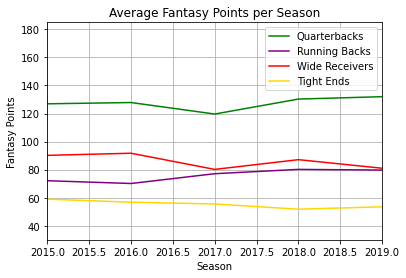

<Figure size 3600x2160 with 0 Axes>

In [153]:
time = np.arange(2015,2020,1)
QBs, = plt.plot(time, QB_points, color = "green", label = "Quarterbacks")
RBs, = plt.plot(time, RB_points, color = "purple", label = "Running Backs")
WRs, = plt.plot(time, WR_points, color = "red", label = "Wide Receivers")
TEs, = plt.plot(time, TE_points, color = "gold", label = "Tight Ends")
plt.title("Average Fantasy Points per Season")
plt.xlabel("Season")
plt.ylabel("Fantasy Points")
plt.xlim(2015,2019)
plt.ylim(30,185)
plt.legend(handles=[QBs, RBs, WRs, TEs], loc="upper right")

plt.grid()

plt.savefig('C:\\Users\\goooo\Git\\pandasy-football-main\\pandasy-football\\Pandamonium\\positionpts.png')
plt.figure(figsize = (50,30))
plt.show()
plt.close()

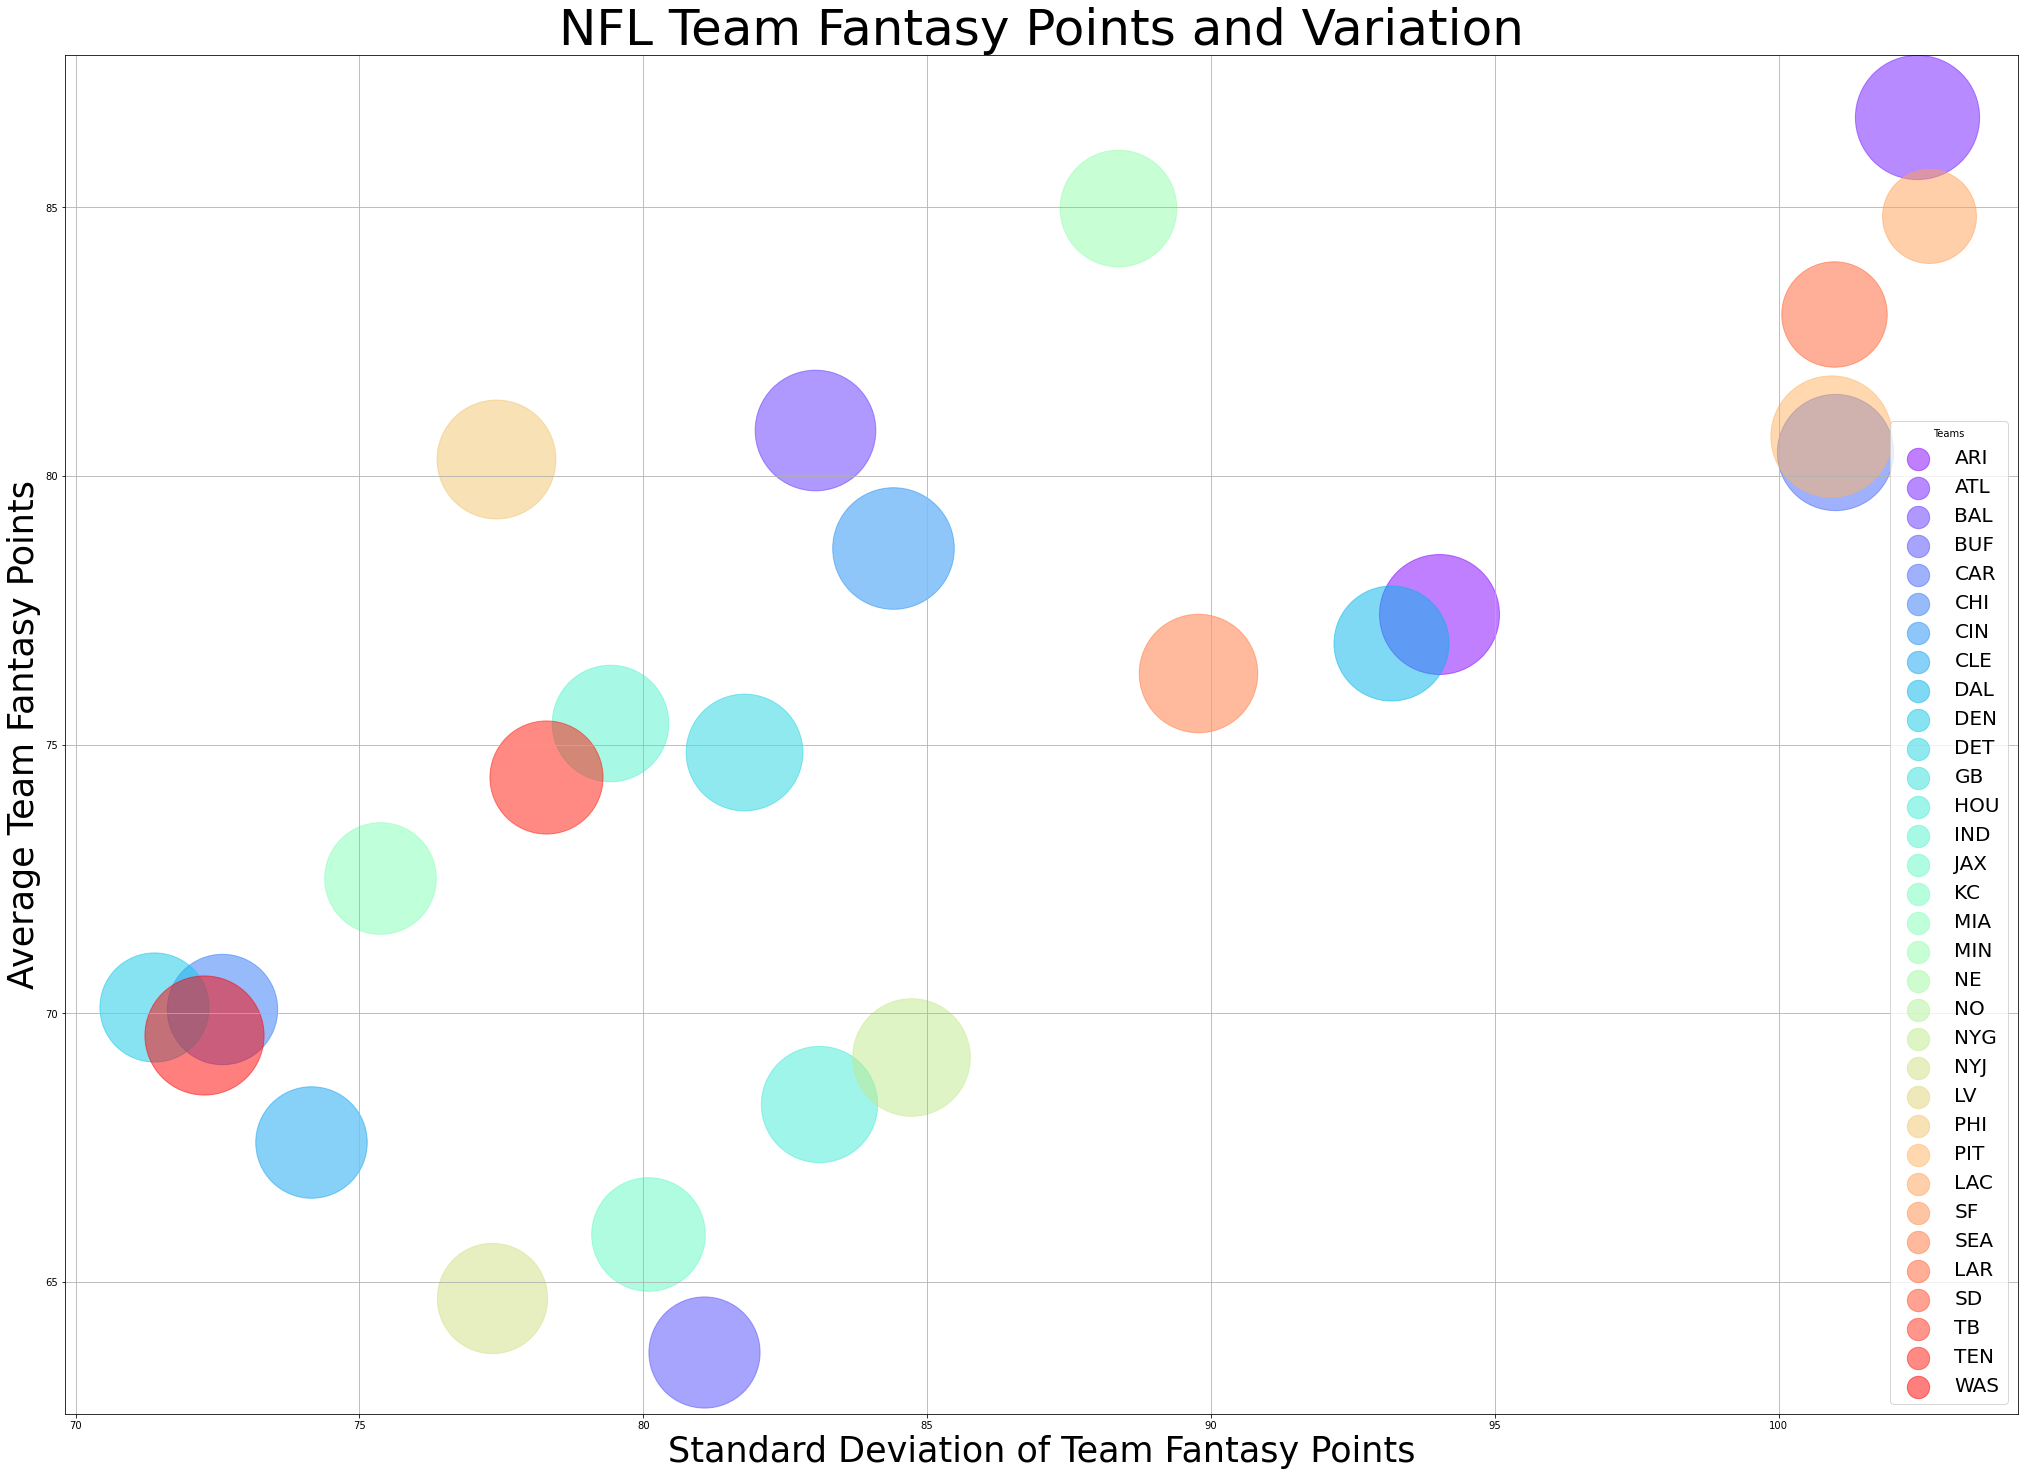

In [137]:
plt.figure(figsize = (35,25))

Teams = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL','DEN','DET','GB','HOU','IND',
        'JAX','KC','MIA','MIN','NE','NO','NYG','NYJ','LV','PHI','PIT','LAC','SF','SEA',
        'LAR','SD','TB','TEN','WAS']
counter = 0
        
colors = iter(cm.rainbow(np.linspace(0, 1, len(Teams))))

for team in Teams:
    plt.scatter(merged_df.loc[merged_df["Team"]==Teams[counter]].groupby("Team")["FantasyPoints"].std(),\
                merged_df.loc[merged_df["Team"]==Teams[counter]].groupby("Team")["FantasyPoints"].mean(),\
                s=merged_df.loc[merged_df["Team"]==Teams[counter]].groupby("Team")["FantasyPoints"].sum()*2,\
                marker="o",alpha=.5, color=next(colors), label=Teams[counter])
    counter +=1

# Incorporate the other graph properties
plt.title("NFL Team Fantasy Points and Variation", size =50)
plt.ylabel("Average Team Fantasy Points", size =35)
plt.xlabel("Standard Deviation of Team Fantasy Points", size = 35)
plt.grid(True)

#The below makes the legend bubbles all the same size
Numbers = np.arange(0,33,1)

# Create a legend
lgnd = plt.legend(loc= "lower right", scatterpoints = 1, fontsize = 20, title="Teams")

for number in Numbers:
    lgnd.legendHandles[number]._sizes = [500]


plt.savefig('C:\\Users\\goooo\Git\\pandasy-football-main\\pandasy-football\\Pandamonium\\fantasybubble.png')

